In [94]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [95]:
dfCSV = pd.read_csv('data/Binance_BTCUSDT_1h.csv')

In [96]:
# Week starts on sunday because english people are weird 
volume = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],[0, 0, 0],]
hourControl= [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

lastDate = 0
endDate = datetime.datetime(2020,8,3).timestamp()
for row in dfCSV.itertuples(index=False, name='BTCPrice'):
    date = datetime.datetime.fromtimestamp(row.unix/1000)
    # I DONT KNOW WHO MERGED THIS DATASET BUT IT USES UNIX WITH TWO DIFFERENT SCALES FUUUUU
    if date.year > 2000: 
        if date == endDate: # End
            lastDate = date
            print(row.unix)
            break

        hour = date.hour

        volume[hour][0] += row.VolumeUSDT
        volume[hour][1] += row.close
        hourControl[hour] += 1
        volume[hour][2] += float(abs(row.close - row.open))
        
        lastDate = date
    
volumeDf = pd.DataFrame (data= volume,columns=['volumeUSDT', 'close', 'priceChange'])
volumeDf['hour'] = ['00:00','01:00','02:00','03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

del volumeDf['close']

print(volumeDf)
print(hourControl)
print(lastDate)


scaler = MinMaxScaler()
 
normalized=pd.DataFrame(scaler.fit_transform(volume),columns=['volumeUSDT', 'close', 'priceChange']) 
del normalized['close']
normalized['hour'] = ['00:00','01:00','02:00','03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
print(normalized)

      volumeUSDT  priceChange   hour
0   1.920693e+10     41518.97  00:00
1   2.410125e+10     52098.54  01:00
2   2.131687e+10     42464.92  02:00
3   1.945429e+10     38453.30  03:00
4   1.893839e+10     43054.08  04:00
5   1.844690e+10     33640.48  05:00
6   1.952994e+10     43697.49  06:00
7   2.006572e+10     35425.66  07:00
8   2.159555e+10     45421.31  08:00
9   2.479072e+10     51308.57  09:00
10  2.641413e+10     44555.73  10:00
11  2.502996e+10     42367.27  11:00
12  2.485118e+10     42701.66  12:00
13  2.929336e+10     49520.57  13:00
14  2.857144e+10     49318.80  14:00
15  2.990443e+10     46390.31  15:00
16  2.880874e+10     47285.61  16:00
17  3.039887e+10     46513.52  17:00
18  2.358708e+10     35204.84  18:00
19  2.138767e+10     43119.27  19:00
20  2.013686e+10     38211.27  20:00
21  2.269452e+10     46304.56  21:00
22  1.968747e+10     40685.26  22:00
23  1.691216e+10     37336.34  23:00
[254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,

In [97]:
sns.set_style("darkgrid")
flatui = ["#4f6d7a","#f19a3e","#69995D","#4a6fa5","#166088","#e27396","#6e4555"]
sns.set_palette(flatui)

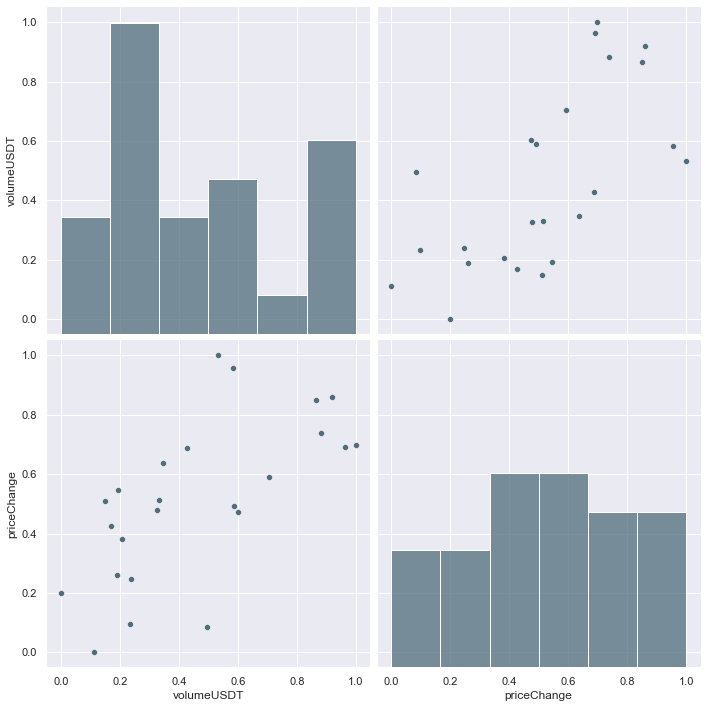

In [98]:
sns.set_color_codes("pastel")
grid=sns.pairplot(normalized, kind="scatter", height=5)

plt.show()

[Text(0, 0.5, 'Timezone GMT+1'),
 Text(0.5, 0, 'Price change for BINANCE:BTCUSDT')]

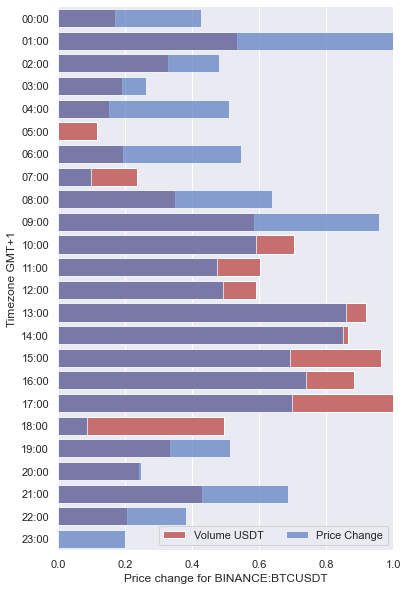

In [99]:
f, ax = plt.subplots(figsize=(6, 10))

sns.set_color_codes("muted")
sns.barplot(x="volumeUSDT", y="hour", data=normalized, label="Volume USDT",
            color="r", alpha=1)

sns.set_color_codes("muted")
ax= sns.barplot(x="priceChange", y="hour", data=normalized,label="Price Change",
            color="b",alpha=0.7)




ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

ax.set(ylabel="Timezone GMT+1",
       xlabel="Price change for BINANCE:BTCUSDT")